# Подготовка

In [ ]:
import numpy as np #инструмент для работы с многомерными массивами с возможностью векторизации вычислений
import pandas as pd #удобные методы реляционного взаимодействия с данными, аналогичные, например, возможностям SQL для слияния и конкатенации таблиц
import matplotlib.pyplot as plt #графики
from scipy import interpolate #библиотека для интерполяции

In [ ]:
df = pd.read_csv("/content/DataSet3_1.csv", sep=",") #DataSet3_1 – Данные о частоте и потребляемой мощности электрической энергии офисным зданием (регулярный временной ряд)
df['Timestamp'] = pd.to_datetime(df['Timestamp']) #переводим время в формат времени
df

,Timestamp,OAT (F),Power (kW)
0,2010-01-01 01:15:00,51,165.1
1,2010-01-01 01:30:00,51,151.6
2,2010-01-01 01:45:00,51,146.9
3,2010-01-01 02:00:00,51,153.7
4,2010-01-01 02:15:00,51,153.8
...,...,...,...
34935,2010-12-30 23:00:00,47,285.8
34936,2010-12-30 23:15:00,44,206.6
34937,2010-12-30 23:30:00,44,205.9
34938,2010-12-30 23:45:00,44,189.4


# Интерполяция сплайном и многочленом

In [ ]:
#берём первые 15 строк
x = pd.to_numeric(df['Timestamp'][1:15])  #дату и время переводим в секунды
y = df['Power (kW)'][1:15]

xnew = np.linspace(x[1],x[14], 100)  #генерируем 100 чисел из интервала х

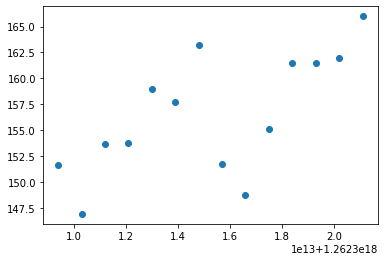

In [ ]:
plt.plot(x, y, 'o') #диаграмма рассеивания 
plt.show()

In [ ]:
f1 = interpolate.interp1d(x.values, y.values, kind = 'cubic') #модель - интерполяция кубическим сплайном

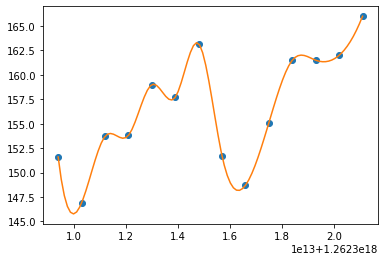

In [ ]:
plt.plot(x, y, 'o', xnew, f1(xnew))

In [ ]:
#функция для интерполяции Лагранжа
def lagrange(x, y, xnew):
    ynew = 0.0
    for i in range(len(y)):
        temp = y[i]
        for j in range(len(y)):
            if i != j:
                temp *= (xnew - x[j]) / (x[i] - x[j])
        ynew += temp
    return ynew

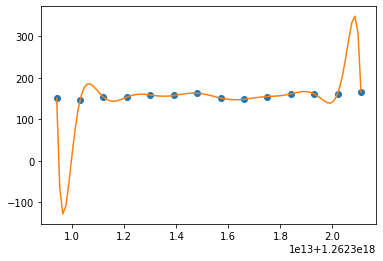

In [ ]:
plt.plot(x,y, 'o', xnew, lagrange(x.values,y.values,xnew))